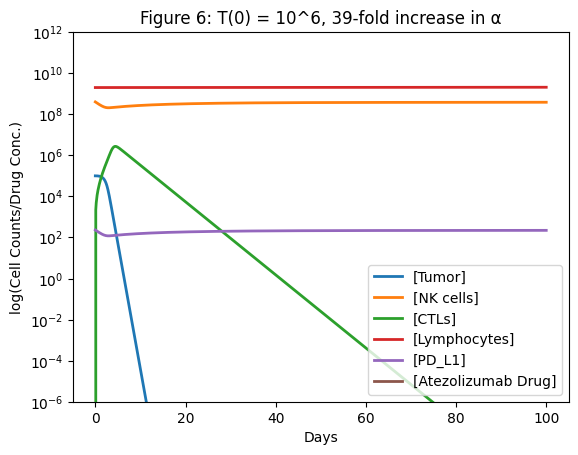

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Parameters ####

a = 0.665
K = 1e9
p_1 = 7.86e-5
alpha_2 = 2286
beta_2 = 1.19e-4
p_2= 3.42e-6
p_3 = 1.87e-8
alpha_3 = 1.6e-5
beta_3 = 3.27
p_6 = 0.0584
alpha_6 = 0.20241
beta_6 = 0.02065
e = 0.012936
f = 0.0693
beta = 6.3e-3
alpha = 1.35e7
I = 2.37e-8
alpha_4 = 2.37e-8
alpha_5 = 1000
L_N = 2.3e8
K_L = 8e8
d= 0.41
p_5= 4.14
p_4= 9e-5
e1 = 23
e2 = 10
rho_P = 1.259e-8
rho_L = 2.51e-8
K_YQ = 1.296e-3
delta_1 = 0.0257
mu = 7.7

### Triple Negative Breast Cancer Model ###

def tnbc_model(x, t):
    dx=np.zeros(6)
    T=x[0]
    N=x[1]
    L=x[2]
    C=x[3]
    P_L=x[4]
    A=x[5]
    temp = (L+e1*T+e2*N)
    P = rho_P*L
    P_LT = (e1*T/(temp))*P_L

    dx[0] = a*T*(1-T/K) - (p_1*T*N**2)/(1+alpha_2*T+beta_2*N**2) - (p_6*T*L)/(1+alpha_6*T+beta_6*L)
    dx[1] = e*C - f*N - p_2*N*T + p_3*N*T/(1+alpha_3*T+beta_3*N)
    dx[2] = (p_4*L_N + p_5*I*L/(alpha_4 + I))*(1-L/K_L)*(T/(alpha_5+T))*(1/(1+P*P_LT/K_YQ)) - d*L
    dx[3] = alpha - beta*C
    dx[4] = (P_L/temp)*(dx[2] + e1*dx[0] + e2*dx[1]) - mu*P_L*A
    dx[5] = D - mu*P_L*A-delta_1*A

    return dx

T0 = 1e5
N0 = 4e8
L0 = 0
C0 = 2e9
P_L0 = rho_L*(L0 + e1*T0 + e1*N0)
A0 = 0
L0 = 0
D = 0

x0 = [T0,N0,L0,C0,P_L0,A0]
t_min1=0; t_max1=100; dt=0.1
times=np.arange(t_min1, t_max1+dt, dt)
from scipy.integrate import odeint
x_sim = odeint(tnbc_model, x0, times)


plt.figure()
plt.plot(times, x_sim[:,0], label="[Tumor]", color='C0', linewidth=2)
plt.plot(times, x_sim[:,1], label="[NK cells]", color='C1', linewidth=2)
plt.plot(times, x_sim[:,2], label="[CTLs]", color='C2', linewidth=2)
plt.plot(times, x_sim[:,3], label="[Lymphocytes]", color='C3', linewidth=2)
plt.plot(times, x_sim[:,4], label="[PD_L1]", color='C4',linewidth=2)
plt.plot(times, x_sim[:,5], label="[Atezolizumab Drug]", color='C5',linewidth=2)


plt.title("Figure 6: T(0) = 10^6, 39-fold increase in α")
plt.xlabel("Days")
plt.ylabel("log(Cell Counts/Drug Conc.)")
plt.yscale('log')
plt.ylim(1e-6, 1e12)
plt.legend(loc="lower right")

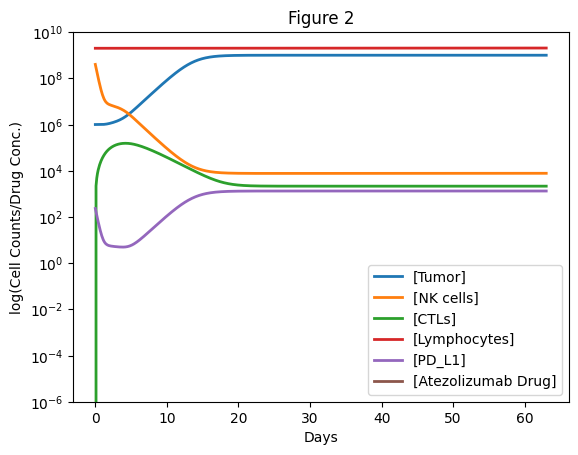

In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Parameters ####

a = 0.665
K = 1e9
p_1 = 7.86e-5
alpha_2 = 2286
beta_2 = 1.19e-4
p_2= 3.42e-6
p_3 = 1.87e-8
alpha_3 = 1.6e-5
beta_3 = 3.27
p_6 = 0.0584
alpha_6 = 0.20241
beta_6 = 0.02065
e = 0.012936
f = 0.0693
beta = 6.3e-3
alpha = 1.35e7
I = 2.37e-8
alpha_4 = 2.37e-8
alpha_5 = 1000
L_N = 2.3e8
K_L = 8e8
d= 0.41
p_5= 4.14
p_4= 9e-5
e1 = 23
e2 = 10
rho_P = 1.259e-8
rho_L = 2.51e-8
K_YQ = 1.296e-3
delta_1 = 0.0257
mu = 7.7

### Triple Negative Breast Cancer Model ###

def tnbc_model(x, t):
    dx=np.zeros(6)
    T=x[0]
    N=x[1]
    L=x[2]
    C=x[3]
    P_L=x[4]
    A=x[5]
    temp = (L+e1*T+e2*N)
    P = rho_P*L
    P_LT = (e1*T/(temp))*P_L

    dx[0] = a*T*(1-T/K) - (p_1*T*N**2)/(1+alpha_2*T+beta_2*N**2) - (p_6*T*L)/(1+alpha_6*T+beta_6*L)
    dx[1] = e*C - f*N - p_2*N*T + p_3*N*T/(1+alpha_3*T+beta_3*N)
    dx[2] = (p_4*L_N + p_5*I*L/(alpha_4 + I))*(1-L/K_L)*(T/(alpha_5+T))*(1/(1+P*P_LT/K_YQ)) - d*L
    dx[3] = alpha - beta*C
    dx[4] = (P_L/temp)*(dx[2] + e1*dx[0] + e2*dx[1]) - mu*P_L*A
    dx[5] = D - mu*P_L*A-delta_1*A

    return dx

T0 = 1e6
N0 = 4e8
L0 = 0
C0 = 2e9
P_L0 = rho_L*(L0 + e1*T0 + e1*N0)
A0 = 0
L0 = 0

x0 = [T0,N0,L0,C0,P_L0,A0]
t_min1=0; t_max1=63; dt=0.1
times=np.arange(t_min1, t_max1+dt, dt)
from scipy.integrate import odeint
x_sim = odeint(tnbc_model, x0, times)


plt.figure()
plt.plot(times, x_sim[:,0], label="[Tumor]", color='C0', linewidth=2)
plt.plot(times, x_sim[:,1], label="[NK cells]", color='C1', linewidth=2)
plt.plot(times, x_sim[:,2], label="[CTLs]", color='C2', linewidth=2)
plt.plot(times, x_sim[:,3], label="[Lymphocytes]", color='C3', linewidth=2)
plt.plot(times, x_sim[:,4], label="[PD_L1]", color='C4',linewidth=2)
plt.plot(times, x_sim[:,5], label="[Atezolizumab Drug]", color='C5',linewidth=2)


plt.title("Figure 2")
plt.xlabel("Days")
plt.ylabel("log(Cell Counts/Drug Conc.)")
plt.yscale('log')
plt.ylim(1e-6, 1e10)
plt.legend()

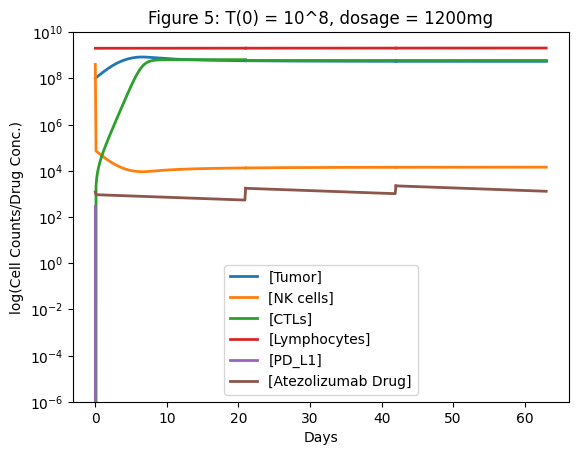

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import DiracDelta


### Parameters ####

a = 0.665
K = 1e9
p_1 = 7.86e-5
alpha_2 = 2286
beta_2 = 1.19e-4
p_2= 3.42e-6
p_3 = 1.87e-8
alpha_3 = 1.6e-5
beta_3 = 3.27
p_6 = 0.0584
alpha_6 = 0.20241
beta_6 = 0.02065
e = 0.012936
f = 0.0693
beta = 6.3e-3
alpha = 1.35e7
I = 2.37e-8
alpha_4 = 2.37e-8
alpha_5 = 1000
L_N = 2.3e8
K_L = 8e8
d= 0.41
p_5= 4.14
p_4= 9e-5
e1 = 23
e2 = 10
rho_P = 1.259e-8
rho_L = 2.51e-8
K_YQ = 1.296e-3
delta_1 = 0.0257
mu = 7.7

### Triple Negative Breast Cancer Model ###

def tnbc_model(x, t):
    dx=np.zeros(6)
    T=x[0]
    N=x[1]
    L=x[2]
    C=x[3]
    P_L=x[4]
    A=x[5]
    temp = (L+e1*T+e2*N)
    P = rho_P*L
    P_LT = (e1*T/(temp))*P_L

    dx[0] = a*T*(1-T/K) - (p_1*T*N**2)/(1+alpha_2*T+beta_2*N**2) - (p_6*T*L)/(1+alpha_6*T+beta_6*L)
    dx[1] = e*C - f*N - p_2*N*T + p_3*N*T/(1+alpha_3*T+beta_3*N)
    dx[2] = (p_4*L_N + p_5*I*L/(alpha_4 + I))*(1-L/K_L)*(T/(alpha_5+T))*(1/(1+P*P_LT/K_YQ)) - d*L
    dx[3] = alpha - beta*C
    dx[4] = (P_L/temp)*(dx[2] + e1*dx[0] + e2*dx[1]) - mu*P_L*A
    dx[5] = - mu*P_L*A-delta_1*A

    return dx

# t_min=0; t_max=63; dt=0.1
# times=np.arange(t_min, t_max+dt, dt)
# x0 = [0,0,0,0,0,0]
# Effect of the model immune resposne is studied, no treatment is considered
# and A(t)=0 is assumed

d_A = 1200
T0 = 1e8
N0 = 4e8
L0 = 0
C0 = 2e9
P_L0 = rho_L*(L0 + e1*T0 + e1*N0)
A0 = 0
L0 = 0

x0 = [T0,N0,L0,C0,P_L0,d_A]
t_min1=0; t_max1=21; dt=0.1
times=np.arange(t_min1, t_max1+dt, dt)
from scipy.integrate import odeint
x_sim = odeint(tnbc_model, x0, times)

x_new0 = x_sim[-1]
x_new0[5] += d_A
t_min2=21; t_max2=42; dt=0.1
times2=np.arange(t_min2, t_max2+dt, dt)
x_new0_sim = odeint(tnbc_model, x_new0, times2)

x_new1 = x_new0_sim[-1]
x_new1[5] += d_A
t_min3=42; t_max3=63; dt=0.1
times3=np.arange(t_min3, t_max3+dt, dt)
x_new1_sim = odeint(tnbc_model, x_new1, times3)


plt.figure()
plt.plot(times, x_sim[:,0], label="[Tumor]", color='C0', linewidth=2)
plt.plot(times, x_sim[:,1], label="[NK cells]", color='C1', linewidth=2)
plt.plot(times, x_sim[:,2], label="[CTLs]", color='C2', linewidth=2)
plt.plot(times, x_sim[:,3], label="[Lymphocytes]", color='C3', linewidth=2)
plt.plot(times, x_sim[:,4], label="[PD_L1]", color='C4',linewidth=2)
plt.plot(times, x_sim[:,5], label="[Atezolizumab Drug]", color='C5',linewidth=2)

plt.plot(times2, x_new0_sim[:,0], color='C0', linewidth=2)
plt.plot(times2, x_new0_sim[:,1], color='C1', linewidth=2)
plt.plot(times2, x_new0_sim[:,2], color='C2', linewidth=2)
plt.plot(times2, x_new0_sim[:,3], color='C3', linewidth=2)
plt.plot(times2, x_new0_sim[:,4], color='C4', linewidth=2)
plt.plot(times2, x_new0_sim[:,5], color='C5', linewidth=2)

plt.plot(times3, x_new1_sim[:,0], color='C0', linewidth=2)
plt.plot(times3, x_new1_sim[:,1], color='C1', linewidth=2)
plt.plot(times3, x_new1_sim[:,2], color='C2', linewidth=2)
plt.plot(times3, x_new1_sim[:,3], color='C3', linewidth=2)
plt.plot(times3, x_new1_sim[:,4], color='C4', linewidth=2)
plt.plot(times3, x_new1_sim[:,5], color='C5', linewidth=2)

plt.title("Figure 5: T(0) = 10^8, dosage = 1200mg")
plt.xlabel("Days")
plt.ylabel("log(Cell Counts/Drug Conc.)")
plt.yscale('log')
plt.ylim(1e-6, 1e10)
plt.legend(loc="lower center")

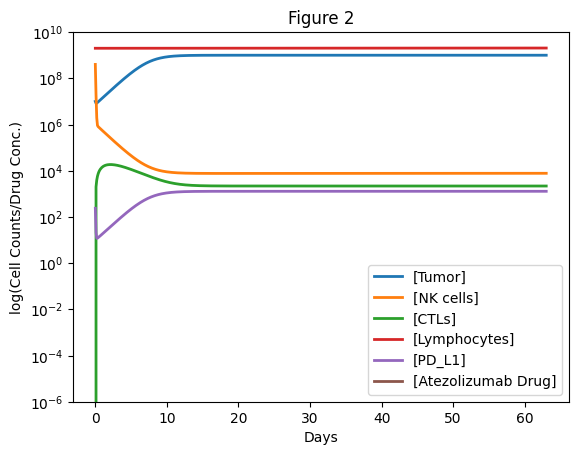

In [5]:
import numpy as np
import matplotlib.pyplot as plt


### Parameters ####

a = 0.665
K = 1e9
p_1 = 7.86e-5*4
alpha_2 = 2286
beta_2 = 1.19e-4
p_2= 3.42e-6
p_3 = 1.87e-8
alpha_3 = 1.6e-5
beta_3 = 3.27
p_6 = 0.0584
alpha_6 = 0.20241
beta_6 = 0.02065
e = 0.012936
f = 0.0693
beta = 6.3e-3
alpha = 1.35e7
I = 2.37e-8
alpha_4 = 2.37e-8
alpha_5 = 1000
L_N = 2.3e8
K_L = 8e8
d= 0.41
p_5= 4.14
p_4= 9e-5
e1 = 23
e2 = 10
rho_P = 1.259e-8
rho_L = 2.51e-8
K_YQ = 1.296e-3
delta_1 = 0.0257
mu = 7.7

### Triple Negative Breast Cancer Model ###

def tnbc_model(x, t):
    dx=np.zeros(6)
    T=x[0]
    N=x[1]
    L=x[2]
    C=x[3]
    P_L=x[4]
    A=x[5]
    temp = (L+e1*T+e2*N)
    P = rho_P*L
    P_LT = (e1*T/(temp))*P_L

    dx[0] = a*T*(1-T/K) - (p_1*T*N**2)/(1+alpha_2*T+beta_2*N**2) - (p_6*T*L)/(1+alpha_6*T+beta_6*L)
    dx[1] = e*C - f*N - p_2*N*T + p_3*N*T/(1+alpha_3*T+beta_3*N)
    dx[2] = (p_4*L_N + p_5*I*L/(alpha_4 + I))*(1-L/K_L)*(T/(alpha_5+T))*(1/(1+P*P_LT/K_YQ)) - d*L
    dx[3] = alpha - beta*C
    dx[4] = (P_L/temp)*(dx[2] + e1*dx[0] + e2*dx[1]) - mu*P_L*A
    dx[5] = D - mu*P_L*A-delta_1*A

    return dx

T0 = 1e7
N0 = 4e8
L0 = 0
C0 = 2e9
P_L0 = rho_L*(L0 + e1*T0 + e1*N0)
A0 = 0
L0 = 0
D = 0

x0 = [T0,N0,L0,C0,P_L0,A0]
t_min1=0; t_max1=63; dt=0.1
times=np.arange(t_min1, t_max1+dt, dt)
from scipy.integrate import odeint
x_sim = odeint(tnbc_model, x0, times)


plt.figure()
plt.plot(times, x_sim[:,0], label="[Tumor]", color='C0', linewidth=2)
plt.plot(times, x_sim[:,1], label="[NK cells]", color='C1', linewidth=2)
plt.plot(times, x_sim[:,2], label="[CTLs]", color='C2', linewidth=2)
plt.plot(times, x_sim[:,3], label="[Lymphocytes]", color='C3', linewidth=2)
plt.plot(times, x_sim[:,4], label="[PD_L1]", color='C4',linewidth=2)
plt.plot(times, x_sim[:,5], label="[Atezolizumab Drug]", color='C5',linewidth=2)


plt.title("Figure 2")
plt.xlabel("Days")
plt.ylabel("log(Cell Counts/Drug Conc.)")
plt.yscale('log')
plt.ylim(1e-6, 1e10)
plt.legend(loc="lower right")

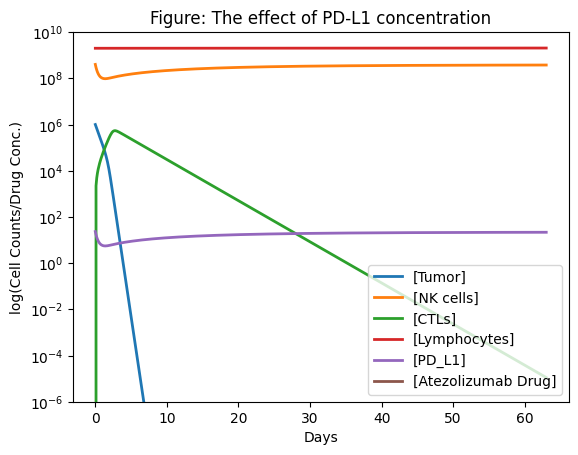

In [6]:
import numpy as np
import matplotlib.pyplot as plt


### Parameters ####

a = 0.665
K = 1e9
p_1 = 7.86e-5*4
alpha_2 = 2286
beta_2 = 1.19e-4
p_2= 3.42e-6
p_3 = 1.87e-8
alpha_3 = 1.6e-5
beta_3 = 3.27
p_6 = 0.0584
alpha_6 = 0.20241
beta_6 = 0.02065
e = 0.012936
f = 0.0693
beta = 6.3e-3
alpha = 1.35e7
I = 2.37e-8
alpha_4 = 2.37e-8
alpha_5 = 1000
L_N = 2.3e8
K_L = 8e8
d= 0.41
p_5= 4.14
p_4= 9e-5
e1 = 23
e2 = 10
rho_P = 1.259e-8
rho_L = 2.51e-9
K_YQ = 1.296e-3
delta_1 = 0.0257
mu = 7.7

### Triple Negative Breast Cancer Model ###

def tnbc_model(x, t):
    dx=np.zeros(6)
    T=x[0]
    N=x[1]
    L=x[2]
    C=x[3]
    P_L=x[4]
    A=x[5]
    temp = (L+e1*T+e2*N)
    P = rho_P*L
    P_LT = (e1*T/(temp))*P_L

    dx[0] = a*T*(1-T/K) - (p_1*T*N**2)/(1+alpha_2*T+beta_2*N**2) - (p_6*T*L)/(1+alpha_6*T+beta_6*L)
    dx[1] = e*C - f*N - p_2*N*T + p_3*N*T/(1+alpha_3*T+beta_3*N)
    dx[2] = (p_4*L_N + p_5*I*L/(alpha_4 + I))*(1-L/K_L)*(T/(alpha_5+T))*(1/(1+P*P_LT/K_YQ)) - d*L
    dx[3] = alpha - beta*C
    dx[4] = (P_L/temp)*(dx[2] + e1*dx[0] + e2*dx[1]) - mu*P_L*A
    dx[5] = D - mu*P_L*A-delta_1*A

    return dx

T0 = 1e6
N0 = 4e8
L0 = 0
C0 = 2e9
P_L0 = rho_L*(L0 + e1*T0 + e1*N0)
A0 = 0
L0 = 0
D = 0

x0 = [T0,N0,L0,C0,P_L0,A0]
t_min1=0; t_max1=63; dt=0.1
times=np.arange(t_min1, t_max1+dt, dt)
from scipy.integrate import odeint
x_sim = odeint(tnbc_model, x0, times)


plt.figure()
plt.plot(times, x_sim[:,0], label="[Tumor]", color='C0', linewidth=2)
plt.plot(times, x_sim[:,1], label="[NK cells]", color='C1', linewidth=2)
plt.plot(times, x_sim[:,2], label="[CTLs]", color='C2', linewidth=2)
plt.plot(times, x_sim[:,3], label="[Lymphocytes]", color='C3', linewidth=2)
plt.plot(times, x_sim[:,4], label="[PD_L1]", color='C4',linewidth=2)
plt.plot(times, x_sim[:,5], label="[Atezolizumab Drug]", color='C5',linewidth=2)


plt.title("Figure: The effect of PD-L1 concentration")
plt.xlabel("Days")
plt.ylabel("log(Cell Counts/Drug Conc.)")
plt.yscale('log')
plt.ylim(1e-6, 1e10)
plt.legend(loc="lower right")

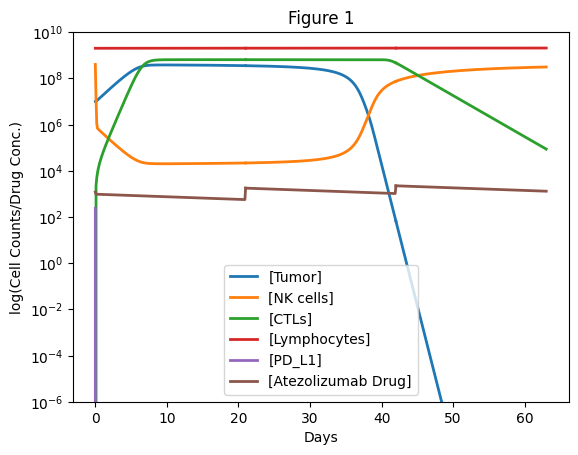

In [7]:
# Testing new dosage 1680 mg Every 4 weeks


import numpy as np
import matplotlib.pyplot as plt
from sympy import DiracDelta


### Parameters ####

a = 0.665
K = 1e9
p_1 = 7.86e-5
alpha_2 = 2286
beta_2 = 1.19e-4
p_2= 3.42e-6
p_3 = 1.87e-8
alpha_3 = 1.6e-5
beta_3 = 3.27
p_6 = 0.0584
alpha_6 = 0.20241
beta_6 = 0.02065
e = 0.012936
f = 0.0693
beta = 6.3e-3
alpha = 1.35e7
I = 2.37e-8
alpha_4 = 2.37e-8
alpha_5 = 1000
L_N = 2.3e8
K_L = 8e8
d= 0.41
p_5= 4.14
p_4= 9e-5
e1 = 23
e2 = 10
rho_P = 1.259e-8
rho_L = 2.51e-8
K_YQ = 1.296e-3
delta_1 = 0.0257
mu = 7.7

### Triple Negative Breast Cancer Model ###

def tnbc_model(x, t):
    dx=np.zeros(6)
    T=x[0]
    N=x[1]
    L=x[2]
    C=x[3]
    P_L=x[4]
    A=x[5]
    temp = (L+e1*T+e2*N)
    P = rho_P*L
    P_LT = (e1*T/(temp))*P_L

    dx[0] = a*T*(1-T/K) - (p_1*T*N**2)/(1+alpha_2*T+beta_2*N**2) - (p_6*T*L)/(1+alpha_6*T+beta_6*L)
    dx[1] = e*C - f*N - p_2*N*T + p_3*N*T/(1+alpha_3*T+beta_3*N)
    dx[2] = (p_4*L_N + p_5*I*L/(alpha_4 + I))*(1-L/K_L)*(T/(alpha_5+T))*(1/(1+P*P_LT/K_YQ)) - d*L
    dx[3] = alpha - beta*C
    dx[4] = (P_L/temp)*(dx[2] + e1*dx[0] + e2*dx[1]) - mu*P_L*A
    dx[5] = - mu*P_L*A-delta_1*A

    return dx

# t_min=0; t_max=63; dt=0.1
# times=np.arange(t_min, t_max+dt, dt)
# x0 = [0,0,0,0,0,0]
# Effect of the model immune resposne is studied, no treatment is considered
# and A(t)=0 is assumed

d_A = 1200
T0 = 1e7
N0 = 4e8
L0 = 0
C0 = 2e9
P_L0 = rho_L*(L0 + e1*T0 + e1*N0)
A0 = 0
L0 = 0

x0 = [T0,N0,L0,C0,P_L0,d_A]
t_min1=0; t_max1=21; dt=0.1
times=np.arange(t_min1, t_max1+dt, dt)
from scipy.integrate import odeint
x_sim = odeint(tnbc_model, x0, times)

x_new0 = x_sim[-1]
x_new0[5] += d_A
t_min2=21; t_max2=42; dt=0.1
times2=np.arange(t_min2, t_max2+dt, dt)
x_new0_sim = odeint(tnbc_model, x_new0, times2)

x_new1 = x_new0_sim[-1]
x_new1[5] += d_A
t_min3=42; t_max3=63; dt=0.1
times3=np.arange(t_min3, t_max3+dt, dt)
x_new1_sim = odeint(tnbc_model, x_new1, times3)


plt.figure()
plt.plot(times, x_sim[:,0], label="[Tumor]", color='C0', linewidth=2)
plt.plot(times, x_sim[:,1], label="[NK cells]", color='C1', linewidth=2)
plt.plot(times, x_sim[:,2], label="[CTLs]", color='C2', linewidth=2)
plt.plot(times, x_sim[:,3], label="[Lymphocytes]", color='C3', linewidth=2)
plt.plot(times, x_sim[:,4], label="[PD_L1]", color='C4',linewidth=2)
plt.plot(times, x_sim[:,5], label="[Atezolizumab Drug]", color='C5',linewidth=2)

plt.plot(times2, x_new0_sim[:,0], color='C0', linewidth=2)
plt.plot(times2, x_new0_sim[:,1], color='C1', linewidth=2)
plt.plot(times2, x_new0_sim[:,2], color='C2', linewidth=2)
plt.plot(times2, x_new0_sim[:,3], color='C3', linewidth=2)
plt.plot(times2, x_new0_sim[:,4], color='C4', linewidth=2)
plt.plot(times2, x_new0_sim[:,5], color='C5', linewidth=2)

plt.plot(times3, x_new1_sim[:,0], color='C0', linewidth=2)
plt.plot(times3, x_new1_sim[:,1], color='C1', linewidth=2)
plt.plot(times3, x_new1_sim[:,2], color='C2', linewidth=2)
plt.plot(times3, x_new1_sim[:,3], color='C3', linewidth=2)
plt.plot(times3, x_new1_sim[:,4], color='C4', linewidth=2)
plt.plot(times3, x_new1_sim[:,5], color='C5', linewidth=2)

plt.title("Figure 1")
plt.xlabel("Days")
plt.ylabel("log(Cell Counts/Drug Conc.)")
plt.yscale('log')
plt.ylim(1e-6, 1e10)
plt.legend(loc="lower center")